<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%201%20DL%202/DataAugmentationDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Augmentation with DNN Exercise

##Get standard MNIST dataset

In [9]:
# load the mnist dataset from keras
import keras
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Create, compile and fit model with original MNIST data only

In [10]:
# Create, compile and fit the model with the original MNIST data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8038 - accuracy: 0.7738 - val_loss: 0.2852 - val_accuracy: 0.9191
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2866 - accuracy: 0.9188 - val_loss: 0.2583 - val_accuracy: 0.9261
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9249 - val_loss: 0.2522 - val_accuracy: 0.9289
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2420 - accuracy: 0.9306 - val_loss: 0.2419 - val_accuracy: 0.9343
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2300 - accuracy: 0.9343 - val_loss: 0.2349 - val_accuracy: 0.9346
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2219 - accuracy: 0.9360 - val_loss: 0.2381 - val_accuracy: 0.9309
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.9385 - val_loss: 0.2342 - val_accuracy:

KeyboardInterrupt: ignored

##Augment the MNIST dataset with rotated, zoomed, width and height shifts

In [12]:
# use the image data generator from keras to augment the data
from keras.preprocessing.image import ImageDataGenerator
# setup the generator that will augment the images
# train_gen = ImageDataGenerator(rotation_range=8,   # rotate
#                                width_shift_range=0.08,  # width shiift
#                                shear_range=0.3,   # shear
#                                height_shift_range=0.08, # height shift
#                                zoom_range=0.08 )   # zoom

train_gen = ImageDataGenerator(width_shift_range=0.08,  # width shiift
                               height_shift_range=0.08 # height shift
                               )   # zoom


import numpy as np
# Generate aungemnted images for the training data
x_train = np.reshape(x_train, (60000,28,28,1))
training_set = train_gen.flow(x_train, y_train, batch_size=x_train.shape[0])

# # Generate aungemnted images for the test data
# x_test = np.reshape(x_test, (10000,28,28,1))
# test_set= train_gen.flow(x_test, y_test, batch_size=x_test.shape[0])

# extract the augmented images from the output flow of the generator
# add the augmented images generated from the training data to the original training data
i = 0
for x, y in training_set:
  if i < 2:
    print(i)
    x_train = np.concatenate((x_train, x))
    y_train = np.concatenate((y_train, y))
    print(x_train.shape)
    print(y_train.shape)
  else:
    break
  i += 1

# add the augmented images generated from the test data to the original test data
# i = 0
# for x, y in test_set:
#   if i < 2:
#     print(i)
#     x_test_aug = np.concatenate((x_test, x))
#     y_test_aug = np.concatenate((y_test, y))
#     print(x_test.shape)
#     print(y_test.shape)
#   else:
#     break
#   i += 1

0
(120000, 28, 28, 1)
(120000, 10)
1
(180000, 28, 28, 1)
(180000, 10)


##Create, compile and fit the model with the augmented MNIST data
(this is the same code as used above to create, compile and fit the model)

Compare this accuracy/loss with the accuracy/loss achieved with the original MNIST dataset above

Epoch 1/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.8299 - accuracy: 0.7503 - val_loss: 0.2888 - val_accuracy: 0.9228
Epoch 2/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4884 - accuracy: 0.8572 - val_loss: 0.2746 - val_accuracy: 0.9218
Epoch 3/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4557 - accuracy: 0.8671 - val_loss: 0.2717 - val_accuracy: 0.9216
Epoch 4/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4401 - accuracy: 0.8721 - val_loss: 0.2708 - val_accuracy: 0.9211
Epoch 5/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4327 - accuracy: 0.8750 - val_loss: 0.2808 - val_accuracy: 0.9179
Epoch 6/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4216 - accuracy: 0.8783 - val_loss: 0.2629 - val_accuracy: 0.9213
Epoch 7/20
5625/5625 [==============================] - 10s 2ms/step - loss: 0.4137 - accuracy: 0.8794 - val_loss: 0.2621 - val_ac

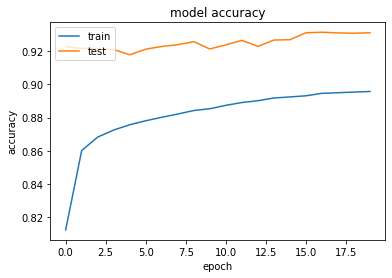

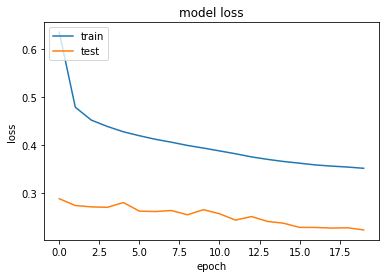

In [13]:
# same as code above to create, compile and fit the model but now using the new augmented data
from keras import layers
from keras import Sequential
from keras.layers import Dense
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

The validation accuracy may be roughly the same but it was overfitting before and now the validation accuracy is much better than the training accuracy.

**However we do not want the validation accuracy to be much higher than the training accuracy as it is in the case above as this means that the validation set consists of easier examples than the training set.**


## Investigate the Keras `ImageDataGenerator` and see what other augmentation you could apply